In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from joblib import parallel_backend

galaxy_data = pd.read_csv("clean_data.csv")
all_inputs = galaxy_data.drop(columns=["subclass"]).values
all_labels = galaxy_data["subclass"].values
nr_features = all_inputs.shape[1]

In [49]:
decision_tree_classifier = DecisionTreeClassifier()

max_depth = 5
max_features = nr_features
features_step = 8
nr_tested_features = max_features // features_step + 2

parameter_grid = {
    'max_depth': list(range(1, max_depth + 1)),
    'max_features': list(range(1, max_features + features_step, features_step)),
}
print(parameter_grid)

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier, parameter_grid, cv=cross_validation, n_jobs=-1)
result = None
with parallel_backend('loky'):
    grid_search.fit(all_inputs, all_labels)


{'max_depth': [1, 2, 3, 4, 5], 'max_features': [1, 9, 17, 25, 33, 41]}


Best score: 0.8532885459238134
Best parameters: {'max_depth': 5, 'max_features': 41}


Text(50.722222222222214, 0.5, 'max_depth')

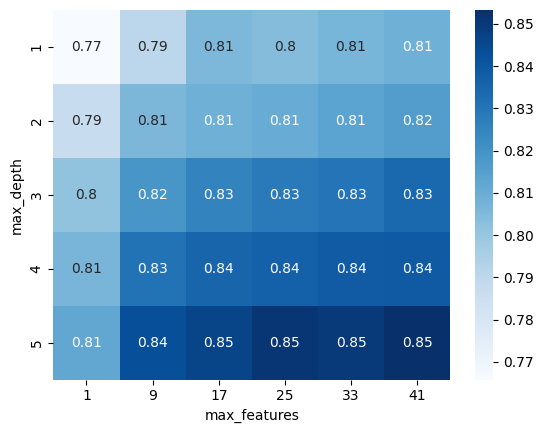

In [52]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (max_depth, nr_tested_features)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.yticks(np.arange(max_depth) + 0.5, grid_search.param_grid['max_depth'])
plt.xticks(np.arange(nr_tested_features) + 0.5, grid_search.param_grid['max_features'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [ ]:
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=StratifiedKFold(n_splits=10))

print(cv_scores)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

KeyboardInterrupt: 

In [ ]:
tree = DecisionTreeClassifier()

all_inputs = galaxy_data.drop(columns=["subclass"]).values
all_labels = galaxy_data["subclass"].values

(training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(
    all_inputs, all_labels, test_size=0.25
)
tree.fit(training_inputs, training_classes)

print("Decision Tree Classifier")
print("Accuracy: ", tree.score(testing_inputs, testing_classes))
print("Feature Importances: ")
print(galaxy_data.drop(columns=["subclass"]).columns)
print(tree.feature_importances_)
print()






              precision    recall  f1-score   support

   STARBURST       0.68      0.68      0.68      5948
 STARFORMING       0.90      0.90      0.90     18422

    accuracy                           0.84     24370
   macro avg       0.79      0.79      0.79     24370
weighted avg       0.84      0.84      0.84     24370



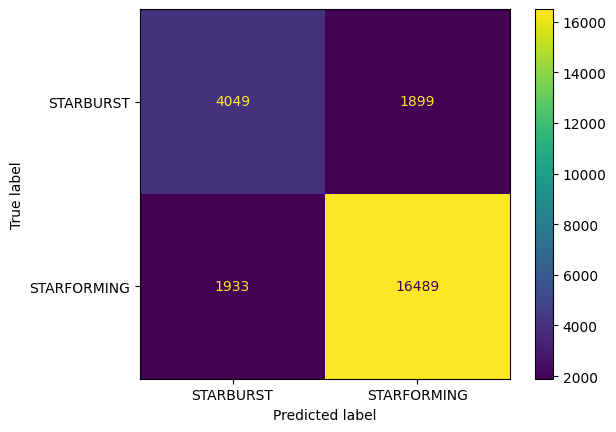

In [ ]:
# Show confusion matrix display
print(classification_report(testing_classes, tree.predict(testing_inputs)))

cf_matrix = confusion_matrix(testing_classes, tree.predict(testing_inputs))
cm = ConfusionMatrixDisplay(cf_matrix, display_labels=tree.classes_)
cm.plot()
plt.show()


In [6]:
print(classification_report(testing_classes, tree.predict(testing_inputs)))

              precision    recall  f1-score   support

   STARBURST       0.69      0.69      0.69      5983
 STARFORMING       0.90      0.90      0.90     18387

    accuracy                           0.85     24370
   macro avg       0.79      0.80      0.79     24370
weighted avg       0.85      0.85      0.85     24370



In [ ]:
def test_classifier(clf, data, labels, parameter_grid, cv=StratifiedKFold(n_splits=10)):
    grid_search = GridSearchCV(clf, parameter_grid, cv=cv, n_jobs=-1)
    with parallel_backend('loky'):
        grid_search.fit(data, labels)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

    return grid_search

